<a href="https://colab.research.google.com/github/vvvipindsm/Interview/blob/master/predicition_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas 
!pip install glob 
!pip install seaborn 
!pip install statsmodels 
!pip install yfinance
import yfinance
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
nifty_raw_data = yfinance.download (tickers = "^NSEI ^GSPC", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  2 of 2 completed


In [16]:
df_comp = nifty_raw_data.copy()

df_comp['nifty'] = df_comp['^NSEI'].Close[:]


df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp = df_comp.iloc[1:]
del df_comp['^GSPC']
del df_comp['^NSEI']




df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
#spa
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100

df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['norm_ret_nifty'] = df_comp.ret_nifty.div(df_comp.ret_nifty[1])*100
size = int(len(df_comp)*0.8)
train, valid = df_comp.iloc[:size], df_comp.iloc[size:]
train = df_comp
train.head()

,nifty,spx,ret_spx,norm_ret_spx,ret_nifty,norm_ret_nifty
,,,,,,
Date,,,,,,
2008-01-09,6272.000000,1409.130005,NaN,NaN,NaN,NaN
2008-01-10,6156.950195,1420.329956,0.794813,100.000000,-1.834340,100.000000
2008-01-11,6200.100098,1401.020020,-1.359539,-171.051360,0.700832,-38.206244
2008-01-14,6206.799805,1416.250000,1.087064,136.769714,0.108058,-5.890841
2008-01-15,6074.250000,1380.949951,-2.492501,-313.595857,-2.135558,116.421052


In [4]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
para_index =1
from pmdarima.arima import auto_arima

model = auto_arima(train.ret_nifty[para_index:],exogenous = train[['ret_spx']][para_index:],start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15344.902, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14194.054, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15342.902, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13799.608, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13502.903, Time=1.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=13322.884, Time=1.59 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=13277.437, Time=1.83 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.14 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=13275.438, Time=1.61 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=13320.885, Time=1.38 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=8.03 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, T

In [45]:
ff = model.fit(train.ret_nifty[para_index:],exogenous = train[['ret_spx']][para_index:])
ss = ff.forecast(steps=11)


AttributeError: ignored

In [21]:
model
#Modeling
# Build Model
!pip install statsmodels
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
new_model = sm.tsa.ARIMA(train.ret_nifty[para_index:],order=(5, 1, 0))
fit = fit_dd = new_model.fit()

prediction = fit.forecast(steps=11)

prediction


2022-06-27    0.525596
2022-06-28    0.527748
2022-06-29    0.434828
2022-06-30    0.455411
2022-07-01    0.605873
2022-07-04    0.554975
2022-07-05    0.520681
2022-07-06    0.512554
2022-07-07    0.519086
2022-07-08    0.533989
2022-07-11    0.536660
Freq: B, Name: predicted_mean, dtype: float64

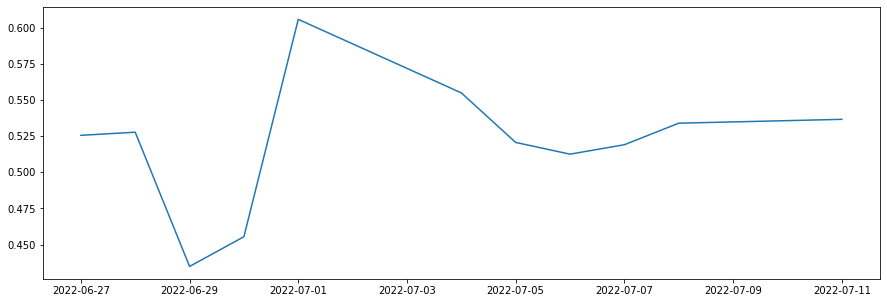

In [41]:
prediction_series = pd.Series(prediction)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(data.Value)
ax.plot(prediction_series)
plt.show()